In [1]:
import numpy as np
import matplotlib.pylab as plot
from astropy.io import ascii,fits
from scipy import interpolate
import grb_catalogs
from BurstCube.LocSim.Detector import *
from BurstCube.LocSim.Spacecraft import *
from astropy.coordinates import SkyCoord
from astropy import units as u
from scipy.optimize import curve_fit
from astropy.table import Table
import healpy as hp
from pylab import cm
import matplotlib.colors as mpl_col

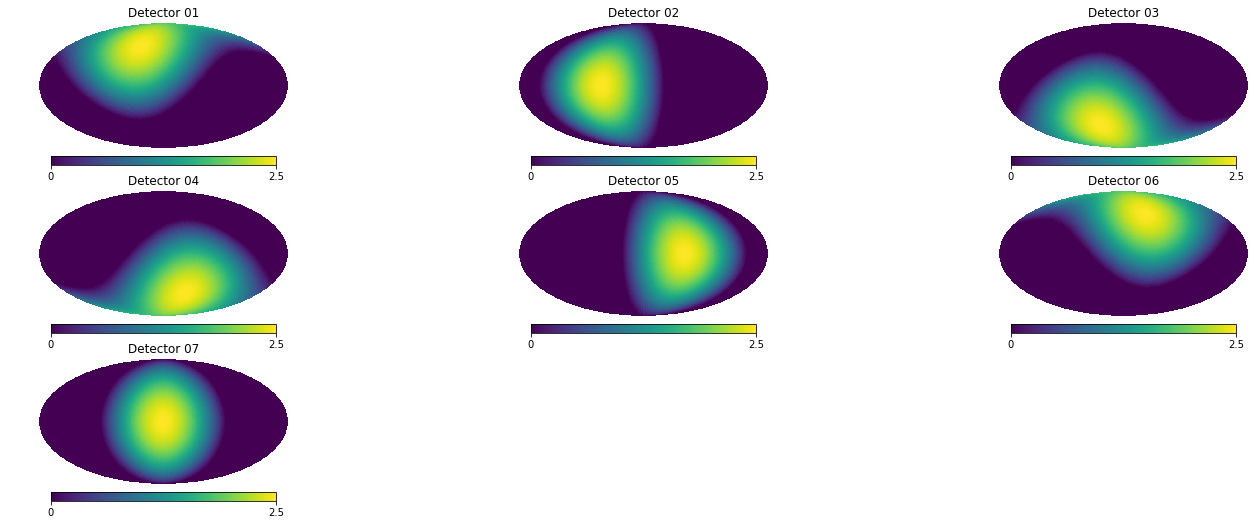

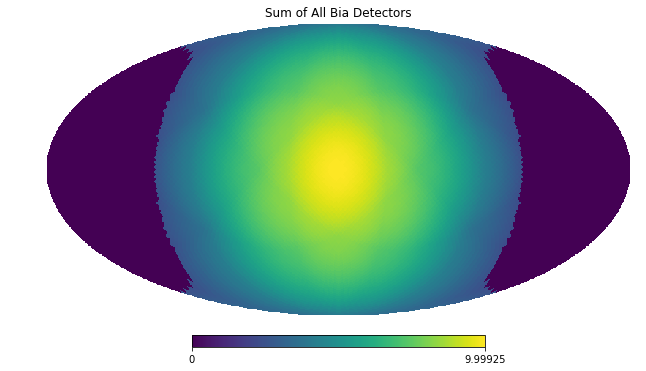

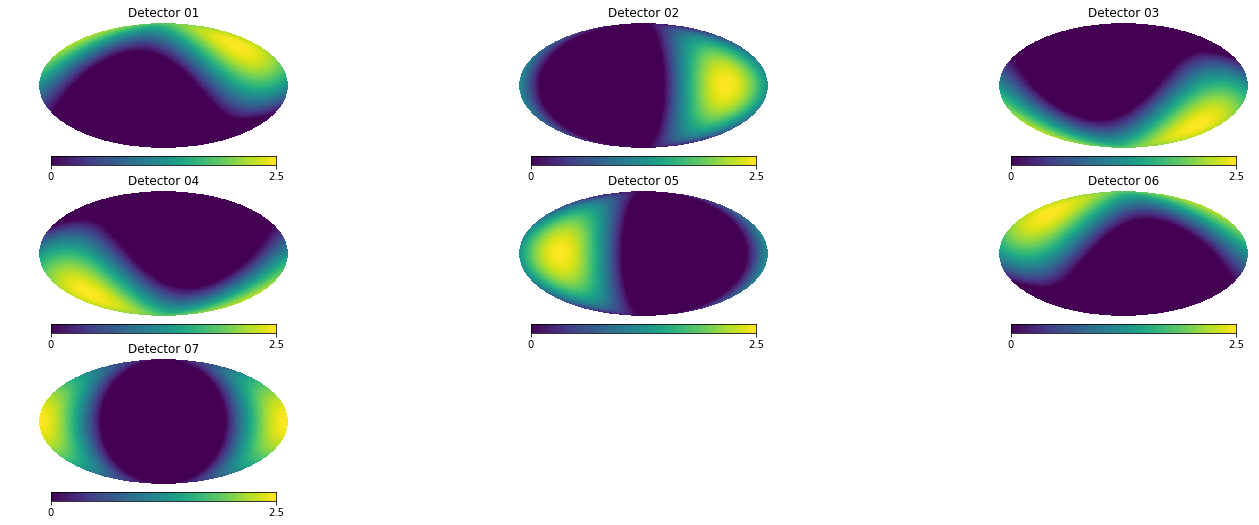

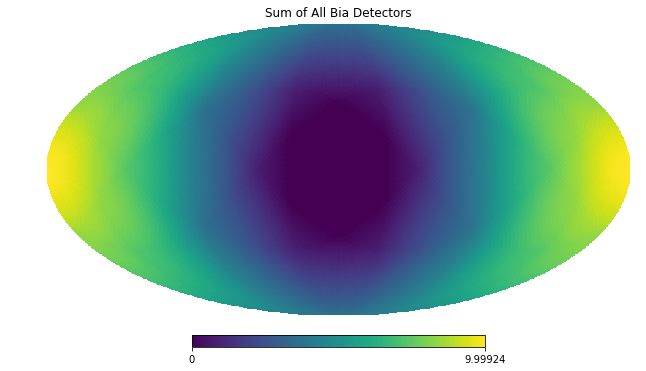

In [11]:
## setup Bia
bia_pointings = {'01': ('30:0:0','60:0:0'),
               '02': ('90:0:0','60:0:0'),
                '03': ('150:0:0','60:0:0'),
               '04': ('210:0:0','60:0:0'),
               '05': ('270:0:0','60:0:0'),
               '06': ('330:0:0','60:0:0'),
               '07': ('0:0:0','0:0:0')}
# bia_pointings = {'01': ('60:0:0','45:0:0'),
#                '02': ('90:0:0','45:0:0'),
#                 '03': ('150:0:0','45:0:0'),
#                '04': ('210:0:0','45:0:0'),
#                '05': ('270:0:0','45:0:0'),
#                '06': ('300:0:0','45:0:0'),
#                '07': ('0:0:0','0:0:0')}
# bia_pointings = {'01': ('60:0:0','40:0:0'),
#                '02': ('90:0:0','70:0:0'),
#                 '03': ('150:0:0','40:0:0'),
#                '04': ('210:0:0','70:0:0'),
#                '05': ('270:0:0','40:0:0'),
#                '06': ('300:0:0','70:0:0'),
#                '07': ('0:0:0','0:0:0')}
Aeff_fact=2.5

npointings=len(bia_pointings)
bia = Spacecraft(bia_pointings,lat='00:00:00',lon='260:00:00')
NSIDE = 32
exposure_positions_hp = np.arange(hp.nside2npix(NSIDE))
exposure_positions_pix = hp.pix2ang(NSIDE, exposure_positions_hp, lonlat=True)
exposure_positions = np.vstack(exposure_positions_pix)
bia_exposures = np.array([[ detector.exposure(position[0],position[1], alt=-90.,index=1) for position in exposure_positions.T] 
                      for detector in bia.detectors])

plot.figure(figsize=(20,npointings))
s=np.argsort(bia_pointings.keys())
for j in range(npointings):
    i=s[j]
    hp.mollview(bia_exposures[i]/max(bia_exposures[i])*Aeff_fact,title='Detector '+bia_pointings.keys()[i],\
                sub = [np.round(npointings/3.+0.5),3,int(str(j+1))])
exps=bia_exposures.sum(axis=0)*Aeff_fact
#bia_fs=(exps-min(exps))/max(exps)
bia_fs=exps#-min(gbm_exps))/max(gbm_exps)
vec=hp.ang2vec(180,0,lonlat=True)
i=hp.query_disc(NSIDE,vec,67*np.pi/180.)
bia_fs[i]=0
hp.mollview(bia_fs,title='Sum of All Bia Detectors')#,max=2.5)


##### bia 2
bia2 = Spacecraft(bia_pointings,lat='00:00:00',lon='80:00:00')
NSIDE = 32
exposure_positions_hp = np.arange(hp.nside2npix(NSIDE))
exposure_positions_pix = hp.pix2ang(NSIDE, exposure_positions_hp, lonlat=True)
exposure_positions = np.vstack(exposure_positions_pix)
bia2_exposures = np.array([[ detector.exposure(position[0],position[1], alt=-90.,index=1) for position in exposure_positions.T] 
                      for detector in bia2.detectors])

plot.figure(figsize=(20,npointings))
s=np.argsort(bia_pointings.keys())
for j in range(npointings):
    i=s[j]
    hp.mollview(bia2_exposures[i]/max(bia2_exposures[i])*Aeff_fact,title='Detector '+bia_pointings.keys()[i],\
                sub = [np.round(npointings/3.+0.5),3,int(str(j+1))])
exps=bia2_exposures.sum(axis=0)*Aeff_fact
#bia_fs=(exps-min(exps))/max(exps)
bia_fs2=exps#-min(gbm_exps))/max(gbm_exps)
vec=hp.ang2vec(180,0,lonlat=True)
# i=hp.query_disc(NSIDE,vec,67*np.pi/180.) ## remove earth
# bia_fs2[i]=0
hp.mollview(bia_fs2,title='Sum of All Bia Detectors')#,max=2.5)

In [12]:
### make lookup table
npix=len(bia_exposures[0])
lookup=np.zeros([npointings*2,npix])

In [13]:
# combine exposures for both Bia spacecrafts
biaexp=np.concatenate((bia_exposures,bia2_exposures),axis=0)

In [14]:
print np.shape(biaexp)
print np.shape(lookup)

(14, 12288)
(14, 12288)


In [15]:
# fill in lookup table
for i in range(npix):
    for j in range(npointings):
        lookup[j,i]=biaexp[j,i]/max(biaexp[:,i])


In [16]:
# select random position on the sky
# generate relative fluxes in detectors
# calc chisq relative to lookup table
# compare input to output position, and other bins that are also acceptable

In [17]:
r=int(np.round(np.random.rand()*12288))
burst=lookup[:,r]
print lookup[:,10123]

[0.         0.         0.         0.         0.         0.3273661
 0.00319501 0.         0.         0.         0.         0.
 0.         0.        ]


In [18]:
chisq=[]
for i in range(len(lookup[0,:])):
    c=np.sum((lookup[:,i]-burst)**2/lookup[:,i])
    chisq.append(c)
print np.shape(lookup)

(14, 12288)


/Users/jracusin/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in divide
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/jracusin/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [24]:
print lookup[:,0]-burst

[ 0.03193499  0.          1.          0.79241056  0.02360899  0.
 -0.36786148  0.          0.          0.          0.          0.
  0.          0.        ]


ValueError: max must be larger than min in range parameter.

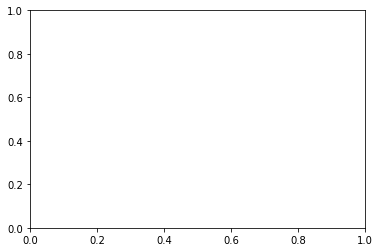

In [20]:
plot.figure()
plot.hist(chisq[chisq>0])
plot.show()
np.argmin(chisq)

In [ ]:
np.shape(chisq)